<a href="https://colab.research.google.com/github/burcualtug/LungDiseasesDetection/blob/main/LungDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install keras_tuner
# %pip install keras
# %pip install tensorflow
# %pip install VGG19
# %pip install --upgrade pip
# %pip install --upgrade tensorflow

import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from tensorflow.keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from keras import layers
from keras.preprocessing import image
import seaborn as sns
from keras import models

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

     |████████████████████████████████| 98 kB 3.7 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/DATA/COVID-19 Radiography Database.zip" -d "/content/drive/MyDrive/DATA/COVID-19_Radiography_Dataset/"

In [ ]:
#load data


train_data = defect_tree = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/DATA/COVID-19_Radiography_Dataset',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear")
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/DATA/COVID-19_Radiography_Dataset",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear"
)

Found 2905 files belonging to 3 classes.
Using 2324 files for training.
Found 2905 files belonging to 3 classes.
Using 581 files for validation.


In [ ]:
#classes 
class_names =  ["COVID-19","NORMAL","Viral Pneumonia"]
for i in range(len(class_names)):
    print(class_names[i] ," " , i)

COVID-19   0
NORMAL   1
Viral Pneumonia   2


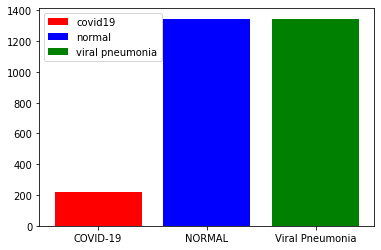

In [ ]:
#visulaize data
import glob
fig, ax = plt.subplots()
ax.bar("COVID-19",len(glob.glob("/content/drive/MyDrive/DATA/COVID-19_Radiography_Dataset/COVID-19/*.png")),color="r",label="covid19")
ax.bar("NORMAL",len(glob.glob("/content/drive/MyDrive/DATA/COVID-19_Radiography_Dataset/NORMAL/*.png")),color="b",label="normal")
ax.bar("Viral Pneumonia",len(glob.glob("/content/drive/MyDrive/DATA/COVID-19_Radiography_Dataset/Viral Pneumonia/*.png")),color="g",label="viral pneumonia")
ax.legend()


In [ ]:
## Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(3, activation= 'softmax')
])

In [ ]:
#to avoid overfitting
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)
#compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
## fit model
history=model.fit(train_data,validation_data= test_data,batch_size=32,epochs = 20,callbacks=[early])

Epoch 1/20
73/73 [==============================] - 329s 4s/step - loss: 1.4261 - accuracy: 0.7823 - val_loss: 0.6992 - val_accuracy: 0.7022
Epoch 2/20
73/73 [==============================] - 43s 538ms/step - loss: 0.2337 - accuracy: 0.9152 - val_loss: 0.2652 - val_accuracy: 0.8916
Epoch 3/20
73/73 [==============================] - 42s 536ms/step - loss: 0.1679 - accuracy: 0.9355 - val_loss: 0.2509 - val_accuracy: 0.8985
Epoch 4/20
73/73 [==============================] - 44s 556ms/step - loss: 0.1345 - accuracy: 0.9540 - val_loss: 0.1757 - val_accuracy: 0.9277
Epoch 5/20
73/73 [==============================] - 44s 554ms/step - loss: 0.0999 - accuracy: 0.9643 - val_loss: 0.1914 - val_accuracy: 0.9329
Epoch 6/20
73/73 [==============================] - 43s 541ms/step - loss: 0.0821 - accuracy: 0.9725 - val_loss: 0.1924 - val_accuracy: 0.9363
Epoch 7/20
73/73 [==============================] - 44s 558ms/step - loss: 0.0598 - accuracy: 0.9811 - val_loss: 0.1949 - val_accuracy: 0.9432
E

In [ ]:
#evaluate model
model.evaluate(test_data)

19/19 [==============================] - 8s 244ms/step - loss: 0.1770 - accuracy: 0.9518


[0.17695803940296173, 0.9518072009086609]

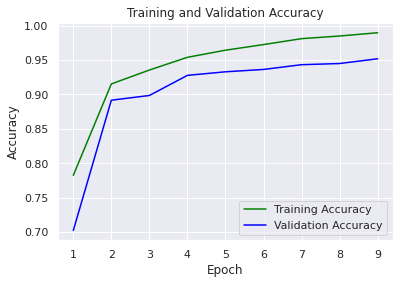

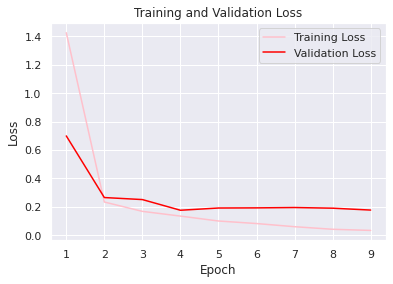

In [ ]:
#plotting training values
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

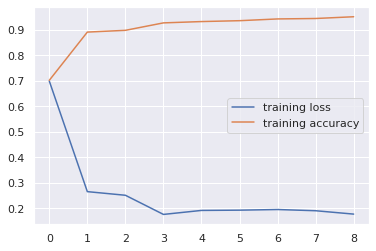

In [ ]:
#train data accuracy and loss
plt.plot(history.history['val_loss'], label = 'training loss')
plt.plot(history.history['val_accuracy'], label = 'training accuracy')
plt.legend()

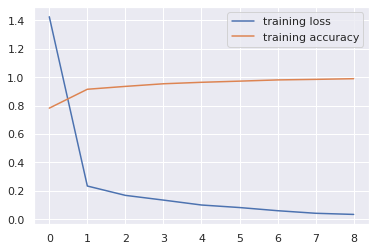

In [ ]:
#test data accuracy and loss
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.legend()

[0]
COVID-19
% 99.95594620704651


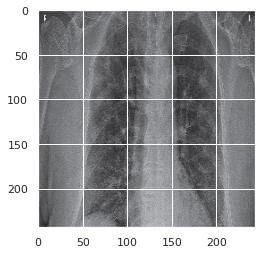

In [ ]:
#example 1
image_path = "/content/drive/MyDrive/DATA/COVID-19_Radiography_Dataset/COVID-19/COVID-19 (1).png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
confidences = prediction
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)
print("%",confidences.ravel()[prediction][0]*100)

[1]
NORMAL
% 0.0005247230092209065


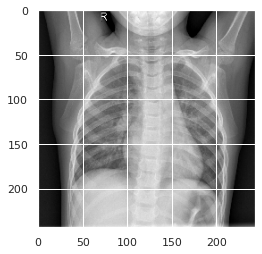

In [ ]:
#example 2
image_path = "/content/drive/MyDrive/DATA/COVID-19_Radiography_Dataset/NORMAL/NORMAL (1).png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)
print("%",confidences.ravel()[prediction][0]*100)

[2]
Viral Pneumonia
% 0.04352829419076443


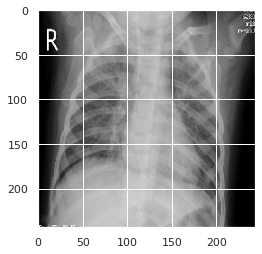

In [ ]:
#example 3
image_path = "/content/drive/MyDrive/DATA/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia (1).png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)
print("%",confidences.ravel()[prediction][0]*100)

In [ ]:
#save file as h5 model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5

model.save("model.h5")



In [ ]:
# File path
filepath = '/content/model.h5'

# Load the model
model = models.load_model(filepath, compile = True)

image_path = "/content/drive/MyDrive/DATA/COVID-19_Radiography_Dataset/COVID-19/COVID-19 (104).png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)

# Generate predictions for samples
predictions = model.predict(img)
print(predictions)

[[9.999839e-01 9.087731e-06 7.016390e-06]]
